In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/CW_dataset/coursework_task01_imageset.zip" -d "/content/drive/MyDrive/CW_dataset/extracted_images/"
!unzip -l "/content/drive/MyDrive/CW_dataset/coursework_task01_imageset.zip"
!unzip "/content/drive/MyDrive/CW_dataset/coursework_task01_imageset.zip" -d "/content/CW_dataset/"

Archive:  /content/drive/MyDrive/CW_dataset/coursework_task01_imageset.zip
replace /content/drive/MyDrive/CW_dataset/extracted_images/imageset/train/n03394916/ILSVRC2012_val_00046669.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os

dataset_path = "/content/CW_dataset/"
for root, dirs, files in os.walk(dataset_path):
    print(f"\n📂 Folder: {root}")
    for file in files[:5]:  # Show only first 5 files per folder
        print(f"  📄 {file}")


📂 Folder: /content/CW_dataset/

📂 Folder: /content/CW_dataset/imageset

📂 Folder: /content/CW_dataset/imageset/val

📂 Folder: /content/CW_dataset/imageset/val/n03445777
  📄 n03445777_11122.JPEG
  📄 n03445777_5310.JPEG
  📄 n03445777_17311.JPEG
  📄 n03445777_8681.JPEG
  📄 n03445777_16051.JPEG

📂 Folder: /content/CW_dataset/imageset/val/n02102040
  📄 n02102040_3601.JPEG
  📄 n02102040_3161.JPEG
  📄 n02102040_4272.JPEG
  📄 n02102040_3381.JPEG
  📄 n02102040_5091.JPEG

📂 Folder: /content/CW_dataset/imageset/val/n01440764
  📄 n01440764_15071.JPEG
  📄 n01440764_9981.JPEG
  📄 ILSVRC2012_val_00037861.JPEG
  📄 n01440764_14790.JPEG
  📄 n01440764_29551.JPEG

📂 Folder: /content/CW_dataset/imageset/val/n03028079
  📄 n03028079_22390.JPEG
  📄 n03028079_10631.JPEG
  📄 n03028079_14770.JPEG
  📄 n03028079_9320.JPEG
  📄 n03028079_28662.JPEG

📂 Folder: /content/CW_dataset/imageset/val/n03394916
  📄 n03394916_21040.JPEG
  📄 n03394916_47472.JPEG
  📄 n03394916_42702.JPEG
  📄 n03394916_36102.JPEG
  📄 n03394916_3

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Class names: ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


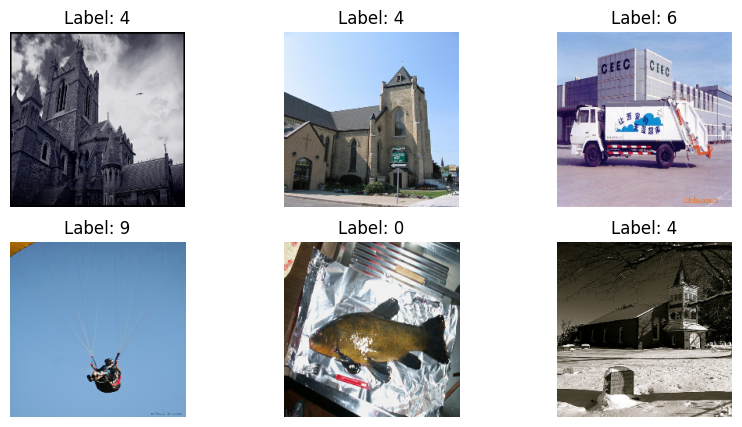

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1, Loss: 1.7640, Accuracy: 41.41%, Validation Loss: 1.5563, Validation Accuracy: 49.63%
Epoch 2, Loss: 0.9697, Accuracy: 68.81%, Validation Loss: 1.2769, Validation Accuracy: 60.56%
Epoch 3, Loss: 0.4219, Accuracy: 86.98%, Validation Loss: 1.6784, Validation Accuracy: 56.89%
Epoch 4, Loss: 0.1540, Accuracy: 95.53%, Validation Loss: 2.1175, Validation Accuracy: 55.44%
Epoch 5, Loss: 0.0947, Accuracy: 97.26%, Validation Loss: 2.2474, Validation Accuracy: 55.95%


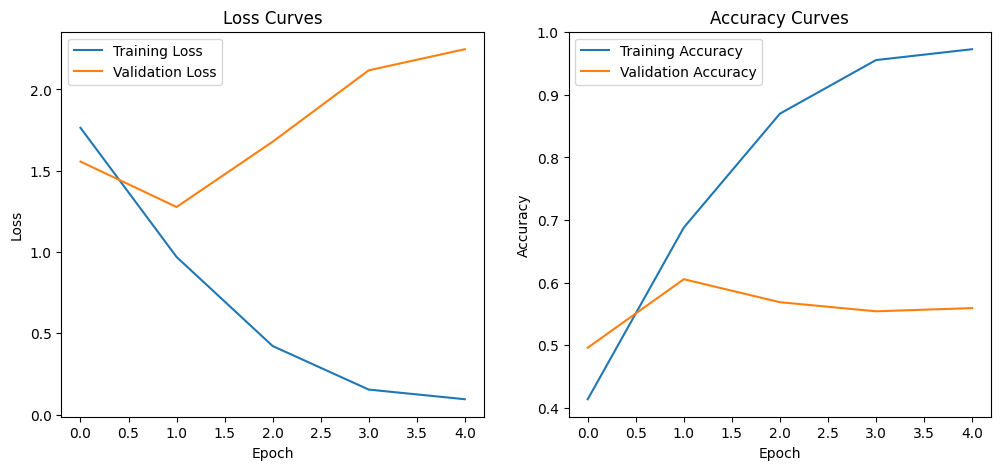

Classification Report:
              precision    recall  f1-score   support

   n01440764       0.62      0.66      0.64       387
   n02102040       0.53      0.63      0.57       395
   n02979186       0.58      0.60      0.59       357
   n03000684       0.34      0.35      0.34       386
   n03028079       0.61      0.67      0.64       409
   n03394916       0.50      0.61      0.55       394
   n03417042       0.61      0.59      0.60       389
   n03425413       0.53      0.40      0.46       419
   n03445777       0.54      0.52      0.53       399
   n03888257       0.80      0.59      0.68       390

    accuracy                           0.56      3925
   macro avg       0.57      0.56      0.56      3925
weighted avg       0.57      0.56      0.56      3925



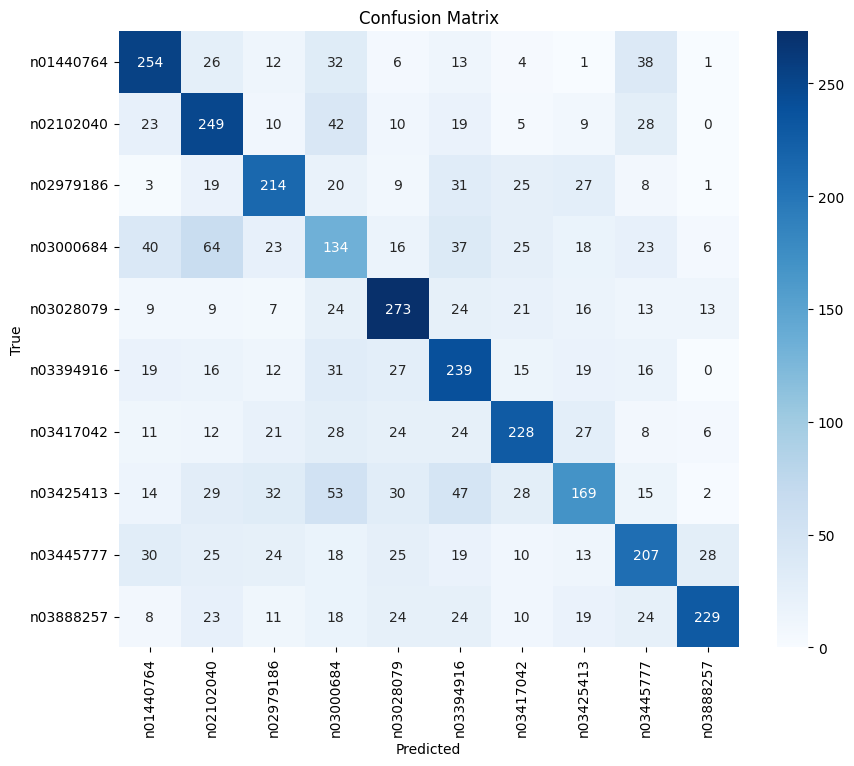

In [ ]:
"""
Image Classification using a Convolutional Neural Network (CNN)

This script trains and evaluates a CNN model for image classification using TensorFlow and Keras.
It loads an image dataset, preprocesses the data, defines a CNN architecture, trains the model,
and evaluates its performance on a validation set. The script also visualizes training metrics
and generates classification reports.

Usage:
1. Ensure the dataset is organized in the following structure:
    CW_dataset/
        imageset/
            train/
                class1/
                class2/
                ...
            val/
                class1/
                class2/
                ...
2. Update the `train_dir` and `val_dir` variables with the correct paths to the dataset.
3. Run the script to train and evaluate the model.

Dependencies:
    - tensorflow
    - matplotlib
    - numpy
    - scikit-learn
    - seaborn

Install dependencies using:
    pip install tensorflow matplotlib numpy scikit-learn seaborn

Author:Christian Ifashe
Date: 12/03/25
Version: 1.0
"""

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define dataset paths
train_dir = "/content/CW_dataset/imageset/train"
val_dir = "/content/CW_dataset/imageset/val"

# Load the dataset and get class names
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="int",
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode="int",
    image_size=(224, 224),
    batch_size=32
)

# Store class names
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Normalize pixel values to the range [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Plot some sample images from the dataset
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
plt.show()

# Define the CNN model
class MyModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(MyModel, self).__init__()
        self.conv1 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))
        self.pool1 = layers.MaxPool2D()
        self.conv2 = layers.Conv2D(64, (3, 3), activation='relu')
        self.pool2 = layers.MaxPool2D()
        self.flatten = layers.Flatten()
        self.d1 = layers.Dense(128, activation='relu')
        self.d2 = layers.Dense(num_classes)  # Output layer with num_classes units

    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

# Create an instance of the model
model = MyModel(len(class_names))

# Define loss function and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# Define metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='val_accuracy')

# Define training function
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)

# Define testing function
@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)
    val_loss(t_loss)
    val_accuracy(labels, predictions)

# Training loop
EPOCHS = 5
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

for epoch in range(EPOCHS):
    train_loss.reset_state()
    train_accuracy.reset_state()
    val_loss.reset_state()
    val_accuracy.reset_state()

    for images, labels in train_ds:
        train_step(images, labels)

    for val_images, val_labels in val_ds:
        val_step(val_images, val_labels)

    # Store metrics for learning curves
    history['loss'].append(train_loss.result().numpy())
    history['val_loss'].append(val_loss.result().numpy())
    history['accuracy'].append(train_accuracy.result().numpy())
    history['val_accuracy'].append(val_accuracy.result().numpy())

    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result():.4f}, '
        f'Accuracy: {train_accuracy.result() * 100:.2f}%, '
        f'Validation Loss: {val_loss.result():.4f}, '
        f'Validation Accuracy: {val_accuracy.result() * 100:.2f}%'
    )

# Plot learning curves
plot_learning_curves(history)

# Evaluate the model on the validation set
evaluate_model(model, val_ds, class_names)

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Number of classes: 10
Class names: ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']
Class names: ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


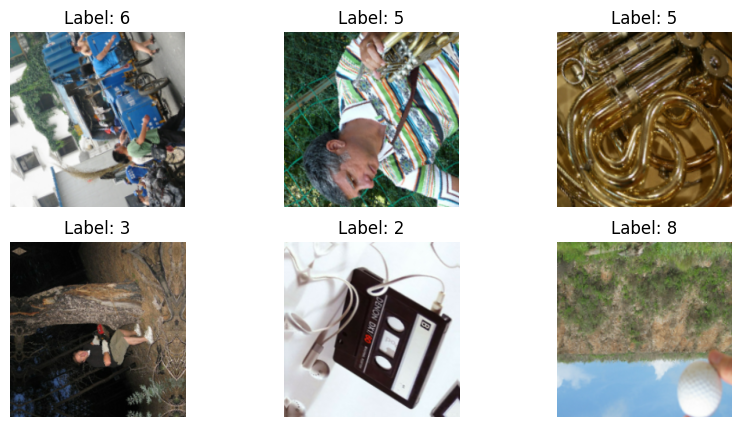

Epoch 1, Loss: 1.8981, Accuracy: 35.32%, Validation Loss: 1.6623, Validation Accuracy: 44.20%
Epoch 2, Loss: 1.5433, Accuracy: 47.91%, Validation Loss: 1.4781, Validation Accuracy: 51.36%
Epoch 3, Loss: 1.4356, Accuracy: 51.70%, Validation Loss: 1.4577, Validation Accuracy: 51.59%
Epoch 4, Loss: 1.3724, Accuracy: 54.25%, Validation Loss: 1.4579, Validation Accuracy: 52.89%
Epoch 5, Loss: 1.3116, Accuracy: 55.47%, Validation Loss: 1.3894, Validation Accuracy: 55.29%
Epoch 6, Loss: 1.2558, Accuracy: 58.31%, Validation Loss: 1.4983, Validation Accuracy: 52.48%
Epoch 7, Loss: 1.2157, Accuracy: 59.48%, Validation Loss: 1.3534, Validation Accuracy: 55.03%
Epoch 8, Loss: 1.1848, Accuracy: 60.23%, Validation Loss: 1.3471, Validation Accuracy: 55.87%
Epoch 9, Loss: 1.1619, Accuracy: 60.90%, Validation Loss: 1.2334, Validation Accuracy: 58.32%
Epoch 10, Loss: 1.1426, Accuracy: 61.93%, Validation Loss: 1.4233, Validation Accuracy: 54.29%
Epoch 11, Loss: 1.1324, Accuracy: 62.44%, Validation Loss: 

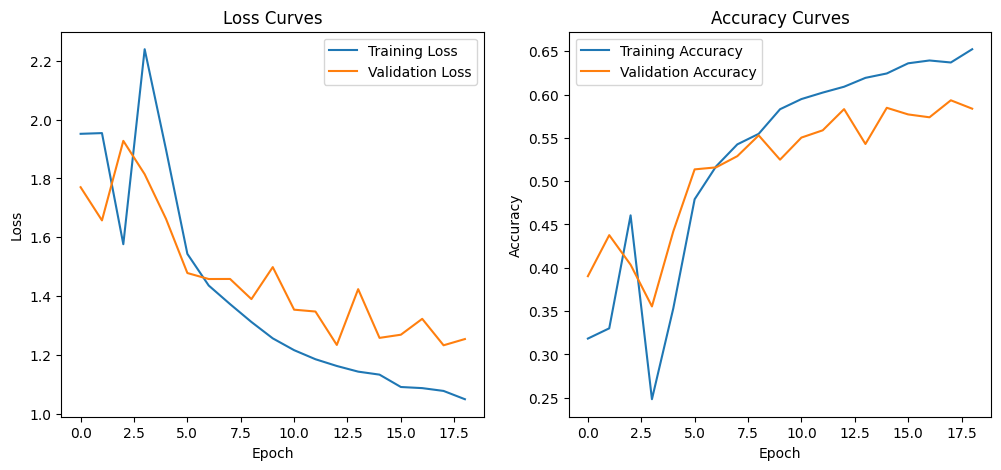

Classification Report:
              precision    recall  f1-score   support

   n01440764       0.81      0.66      0.73       387
   n02102040       0.94      0.36      0.52       395
   n02979186       0.71      0.59      0.65       357
   n03000684       0.48      0.36      0.41       386
   n03028079       0.56      0.64      0.60       409
   n03394916       0.63      0.58      0.60       394
   n03417042       0.49      0.66      0.56       389
   n03425413       0.44      0.55      0.49       419
   n03445777       0.53      0.63      0.58       399
   n03888257       0.61      0.81      0.69       390

    accuracy                           0.58      3925
   macro avg       0.62      0.58      0.58      3925
weighted avg       0.62      0.58      0.58      3925



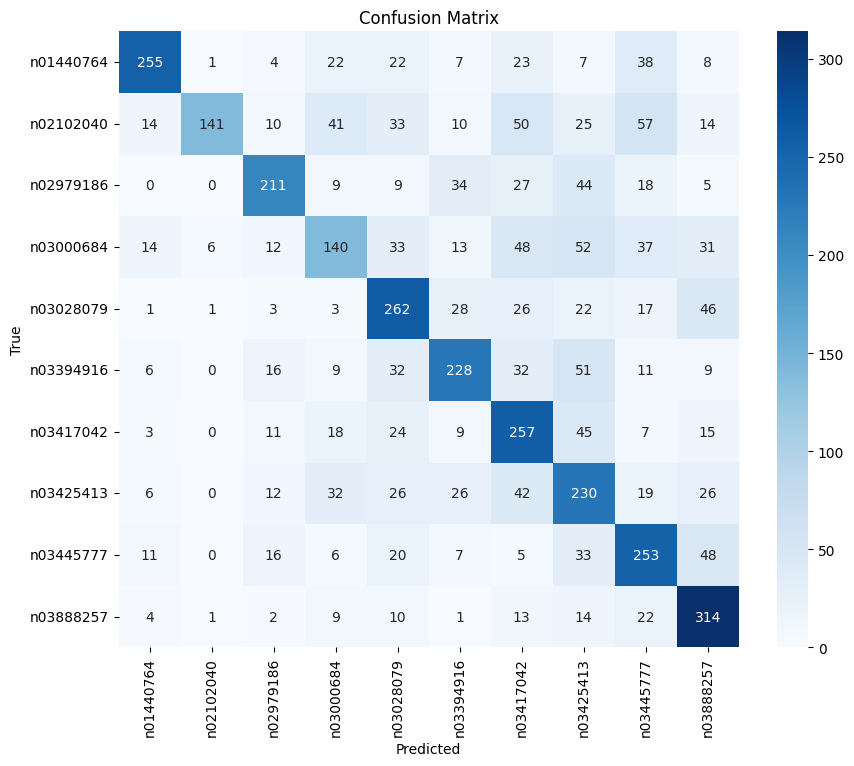

In [ ]:
"""
Image Classification using a Convolutional Neural Network (CNN) with Data Augmentation and Regularization

This script trains and evaluates a CNN model for image classification using TensorFlow and Keras.
It includes data augmentation, dropout, and L2 regularization to improve model generalization.
The script loads an image dataset, preprocesses the data, defines a CNN architecture, trains the model,
and evaluates its performance on a validation set. It also includes early stopping to prevent overfitting
and visualizes training metrics.

Usage:
1. Ensure the dataset is organized in the following structure:
    CW_dataset/
        imageset/
            train/
                class1/
                class2/
                ...
            val/
                class1/
                class2/
                ...
2. Update the `train_dir` and `val_dir` variables with the correct paths to the dataset.
3. Run the script to train and evaluate the model.

Key Features:
    - Data Augmentation: Random flipping, rotation, and zooming to increase dataset diversity.
    - Regularization: L2 regularization and dropout to reduce overfitting.
    - Early Stopping: Stops training if validation loss does not improve for 3 epochs.
    - Learning Curves: Visualizes training and validation loss/accuracy over epochs.

Dependencies:
    - tensorflow
    - matplotlib

Install dependencies using:
    pip install tensorflow matplotlib

Author: Christian Ifashe
Date: 12/03/25
Version: 1.0
"""

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = "/content/CW_dataset/imageset/train"
val_dir = "/content/CW_dataset/imageset/val"

# Load the new dataset using image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="int",  # Use "int" for integer labels
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    label_mode="int",
    image_size=(224, 224),
    batch_size=32
)

# Get the number of classes and class names from the dataset
num_classes = len(train_ds.class_names)  # Access class_names before mapping
print(f"Number of classes: {num_classes}")
print(f"Class names: {train_ds.class_names}")

# Store class names
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Normalize pixel values to the range [0, 1]
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Apply augmentation to the training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Plot some sample images from the dataset
plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
plt.show()

# Define the CNN model with Dropout and L2 Regularization
class MyModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(MyModel, self).__init__()
        self.conv1 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.pool1 = layers.MaxPool2D()
        self.conv2 = layers.Conv2D(64, (3, 3), activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.pool2 = layers.MaxPool2D()
        self.flatten = layers.Flatten()
        self.d1 = layers.Dense(128, activation='relu',
                               kernel_regularizer=tf.keras.regularizers.l2(0.001))
        self.dropout = layers.Dropout(0.5)  # Dropout layer with 50% dropout rate
        self.d2 = layers.Dense(num_classes)

    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.dropout(x)  # Apply dropout
        return self.d2(x)

# Create an instance of the model
model = MyModel(num_classes)

# Define loss function and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Define metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='val_accuracy')

# Define training function
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)

# Define testing function
@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)
    val_loss(t_loss)
    val_accuracy(labels, predictions)

# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,  # Stop after 3 epochs without improvement
    restore_best_weights=True
)

# Training loop
EPOCHS = 15
for epoch in range(EPOCHS):
    train_loss.reset_state()
    train_accuracy.reset_state()
    val_loss.reset_state()
    val_accuracy.reset_state()

    for images, labels in train_ds:
        train_step(images, labels)

    for val_images, val_labels in val_ds:
        val_step(val_images, val_labels)

    # Store metrics for learning curves
    history['loss'].append(train_loss.result().numpy())
    history['val_loss'].append(val_loss.result().numpy())
    history['accuracy'].append(train_accuracy.result().numpy())
    history['val_accuracy'].append(val_accuracy.result().numpy())

    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result():.4f}, '
        f'Accuracy: {train_accuracy.result() * 100:.2f}%, '
        f'Validation Loss: {val_loss.result():.4f}, '
        f'Validation Accuracy: {val_accuracy.result() * 100:.2f}%'
    )

    # Early stopping check
    if early_stopping.model is not None:
        print("Early stopping triggered.")
        break

# Plot learning curves
plot_learning_curves(history)

# Evaluate the model on the validation set
evaluate_model(model, val_ds, class_names)

# Save the model
#model.save("image_classification_model.h5")